In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
import shap


In [2]:
df = pd.read_csv(r'C:\Users\NickBowen\Projects\NFL Data Project\Game Data\NFL_TeamGame_Stats2024 - Sheet1.csv')

In [3]:
# Split the data into features and target
X = df.drop(['Points','Week','Win/Loss','Opponent Points','Opponent','Team'], axis=1)
y = df['Points']

In [4]:
# Define categorical columns after dropping the specified columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [5]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Polynomial Regression': Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('linear_regression', LinearRegression())
    ]),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create a column transformer for one-hot encoding and imputation
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
            ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))  # Ignore unknown categories
        ]), categorical_cols),
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['float64', 'int64']).columns)  # Impute missing values with the mean for numerical columns
    ],
    remainder='passthrough'  # Keep the rest of the columns unchanged
)

                            MAE        MSE        R2
Linear Regression      4.593064  37.625644  0.511530
Ridge Regression       3.964835  26.956787  0.650037
Lasso Regression       4.371162  29.409424  0.618196
Polynomial Regression  5.526560  43.262667  0.438348
Decision Tree          5.050000  38.350000  0.502126
Random Forest          4.308000  32.966260  0.572020
Gradient Boosting      4.149763  29.524946  0.616696
XGBoost                4.232513  29.590157  0.615849


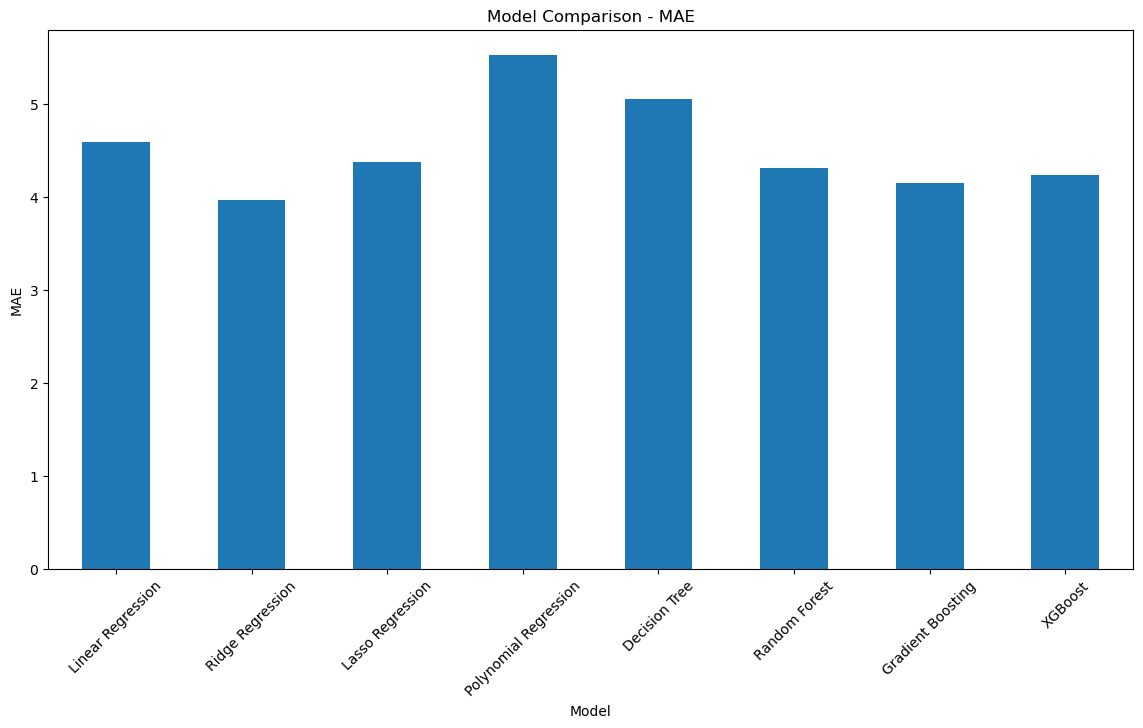

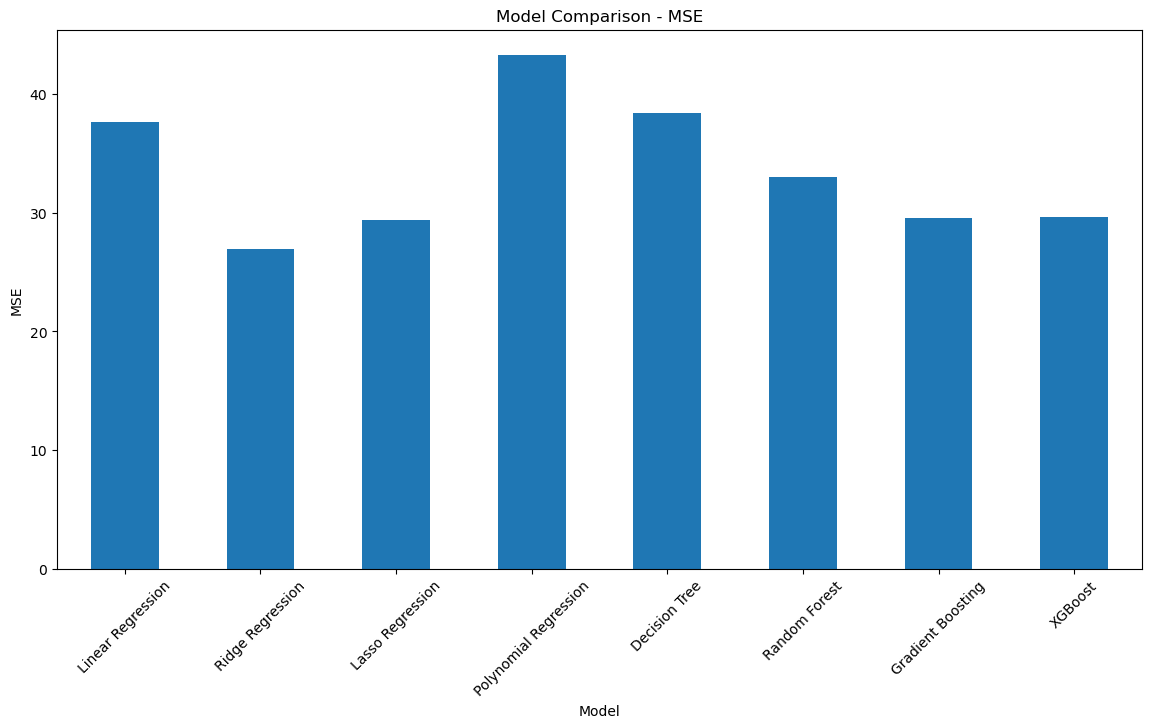

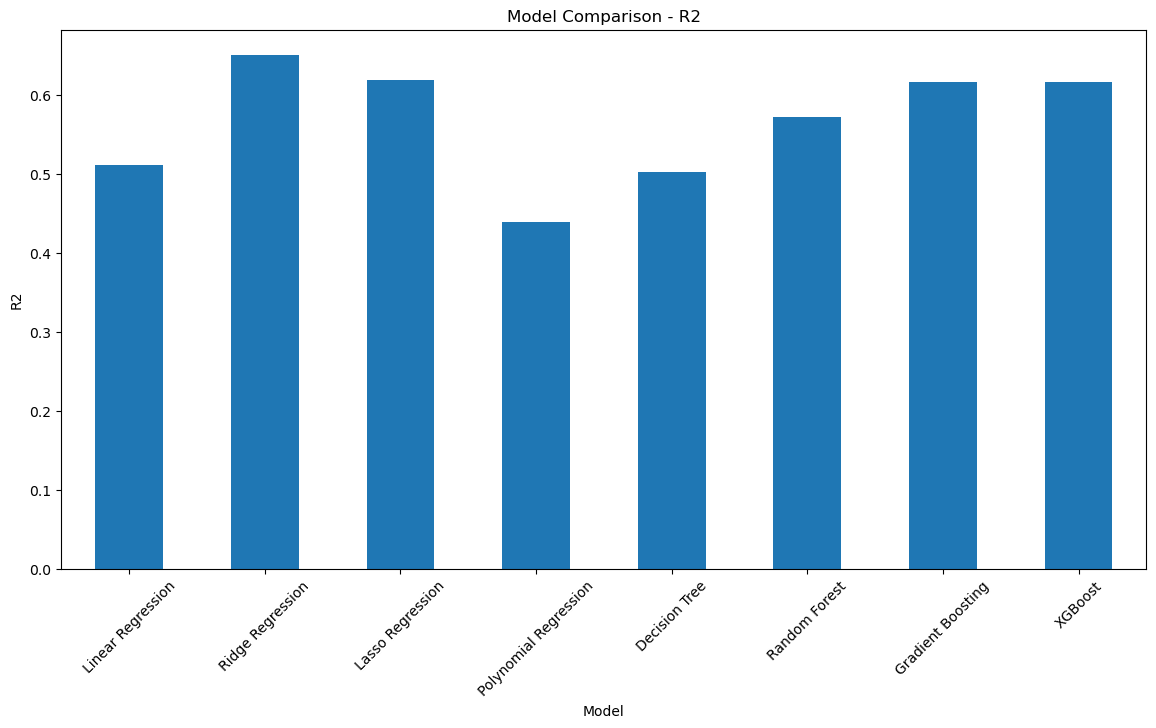

In [9]:
# Assuming 'results' is a dictionary with model performance metrics
# Convert the results dictionary to a DataFrame for easier comparison
results_df = pd.DataFrame(results).T

# Display the results
print(results_df)

# Plot each performance metric in its own chart
metrics = results_df.columns

for metric in metrics:
    plt.figure(figsize=(14, 7))
    results_df[metric].plot(kind='bar')
    plt.title(f'Model Comparison - {metric}')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.show()